In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

data = {
    'R&D Spend': np.random.randint(50000, 200000, 100),
    'Administration Spend': np.random.randint(30000, 150000, 100),
    'Marketing Spend': np.random.randint(20000, 120000, 100),
    'Profit': np.random.randint(50000, 300000, 100)
}

df = pd.DataFrame(data)


           R&D Spend  Administration Spend  Marketing Spend         Profit
count     100.000000            100.000000       100.000000     100.000000
mean   122365.400000          95535.910000     68409.790000  176944.220000
std     45071.171615          35604.221649     29638.582476   65442.539546
min     50769.000000          30206.000000     20854.000000   52869.000000
25%     85745.500000          64531.250000     43415.750000  125407.500000
50%    117328.000000          97028.000000     69082.500000  179882.000000
75%    166998.500000         125404.000000     92235.000000  228574.500000
max    199503.000000         149324.000000    118506.000000  298930.000000


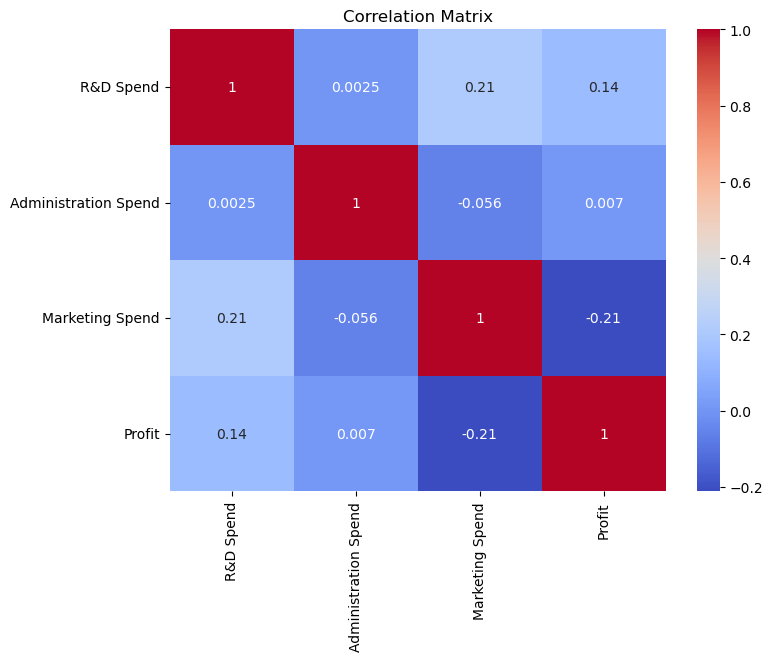

In [3]:
# Display basic statistics
print(df.describe())

# Visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
X = df[['R&D Spend', 'Administration Spend', 'Marketing Spend']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 174714.03420874945
Coefficients: [ 0.29870763  0.12919024 -0.64669079]


In [6]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 69531.4730229226
R²: -0.024469748152023074


C:\Users\t4she\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


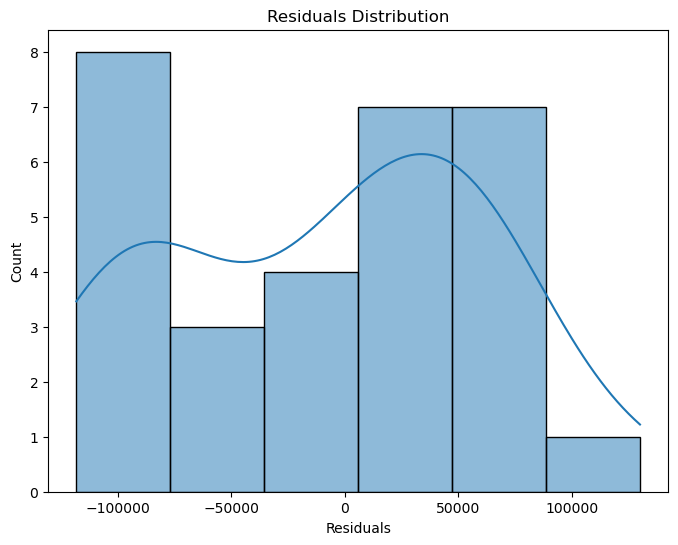

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()
